<a href="https://colab.research.google.com/github/ashrivas99/SyntheticData/blob/main/Synthetic_Data_Generation_AI_101_%7C_Jordan_Harrod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Welcome to the tutorial! Today, we’re going to go through some examples of synthetic data generation.

This tutorial accompanies the [Synthetic Data Generation](https://youtu.be/-vUoRZgWKUw) video on [Jordan Harrod's ](https://www.youtube.com/jordanharrod)YouTube channel. Follow along there, or experiment on your own!

**To start, you can either click on the arrow in the top left corner of the next code block (next to "import tensorflow as tf") or click Copy to Drive on the top left (above this text block) so that you can edit this notebook.**

In [ ]:
!pip install wandb
import wandb
import keras
import tensorflow as tf
import numpy as np
from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense # Keras is also a popular machine learning library - it runs on TensorFlow, making it easier to build models.
import matplotlib.pyplot as plt # matplotlib handles graphing
from wandb.keras import WandbCallback

wandb.login()
wandb.init(project="synth-data-youtube", config={"hyper": "parameter"}) # change the project name to whatever you want!

wandb: Currently logged in as: jordan-b-harrod (use `wandb login --relogin` to force relogin)


In [ ]:
!pip install sklearn pydbgen
import sklearn
import pydbgen
from sklearn import svm
from sklearn.datasets import make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split

X, y = make_classification(n_features=2, n_redundant=0, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
wandb.log({"chart": plt})

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probas = clf.predict_proba(X_test)

wandb.sklearn.plot_classifier(clf, X_train, X_test, y_train, y_test, y_pred = y_pred, y_probas=y_probas, labels=['1','2'], model_name='SVC', feature_names=None)



wandb: 
wandb: Plotting SVC.
wandb: WARNING feature_importances_ or coef_ attribute not in classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged learning curve.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision recall curve.


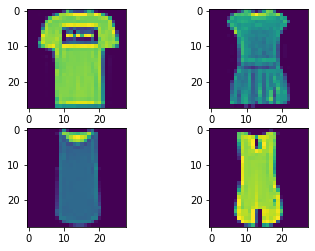

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

example = np.rot90(x_train[0])
x_train = x_train[:,np.newaxis,:,:]
x_test = x_test[:,np.newaxis,:,:]
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.squeeze(x_train[1,:,:]))
axs[1, 0].imshow(np.squeeze(x_train[2,:,:]))
axs[0, 1].imshow(np.squeeze(x_train[3,:,:]))
axs[1, 1].imshow(np.squeeze(x_train[4,:,:]))
plt.show()

wandb.log({"example_ims": fig})

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(1,28, 28),filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Conv2D(filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[WandbCallback()])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 14, 4)          1796      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 7, 4)           260       
_________________________________________________________________
flatten (Flatten)            (None, 28)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                290       
Total params: 2,346
Trainable params: 2,346
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 9.0731 - acc: 0.3975 - val_loss: 2.3684 - val_acc: 0.5631
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5096 - acc: 0.6187 - val_loss: 1.1258 - 

1


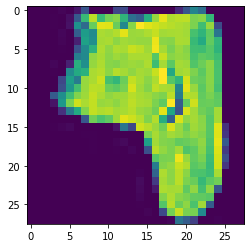

In [ ]:
print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))
plt.figure()
plt.imshow(np.squeeze(example))

wandb.log({"example_rot": fig})


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=180, data_format="channels_first")
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test), callbacks=[WandbCallback()])

print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))



Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 2.3410 - acc: 0.2390 - val_loss: 1.7174 - val_acc: 0.3930
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.8510 - acc: 0.3356 - val_loss: 1.7214 - val_acc: 0.3797
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.7717 - acc: 0.3719 - val_loss: 1.7061 - val_acc: 0.4033
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.7293 - acc: 0.3882 - val_loss: 1.6985 - val_acc: 0.4014
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6944 - acc: 0.4049 - val_loss: 1.7014 - val_acc: 0.3954
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.6693 - acc: 0.4153 - val_loss: 1.6686 - val_acc: 0.4022
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6521 - acc: 0.4220 - val_loss: 1.6250 - val_acc: 0.4230
Epoch 8/10
1875/1875 [==============================] -

In [ ]:
print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))